In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np
from scipy.stats import linregress

In [2]:
#load in csvs
mouse_metadata_path = Path("Data/Mouse_metadata.csv")
study_results_path = Path("Data/Study_results.csv")

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
#merge csv
mouse_data_complete = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#checking number of mice
mice_num = mouse_data_complete["Mouse ID"].nunique()
mice_num

249

In [6]:
#getting the duplicate mice ID number that shows up for mouse ID and timepoint
dup_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique
dup_mice

<bound method Series.unique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [7]:
#optional: get all the data for the duplicate mouse ID
dup_mice_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989",:]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
#create a clean dataframe by dropping the duplicate mouse by its ID
clean_df= mouse_data_complete[mouse_data_complete['Mouse ID'] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
#checking the number of mice in the clean dataframe
clean_mice_num = clean_df["Mouse ID"].nunique()
clean_mice_num


248

In [10]:
#generate a summary  statistics table of mean, median, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
#generate a summary statistics table of mean, median, variance, standard deviation, and sem of the tumor volume for each region
#using the aggregation method, produce the same summary statistics in a single line
agg_sum =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
#getting mice count for bar plot
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

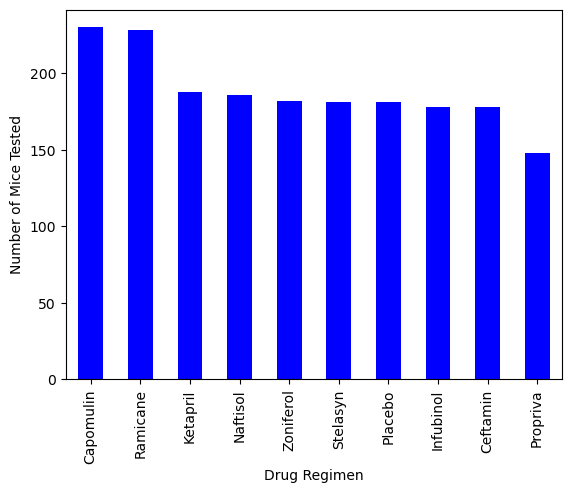

In [13]:
#generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas
pandas_plot = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


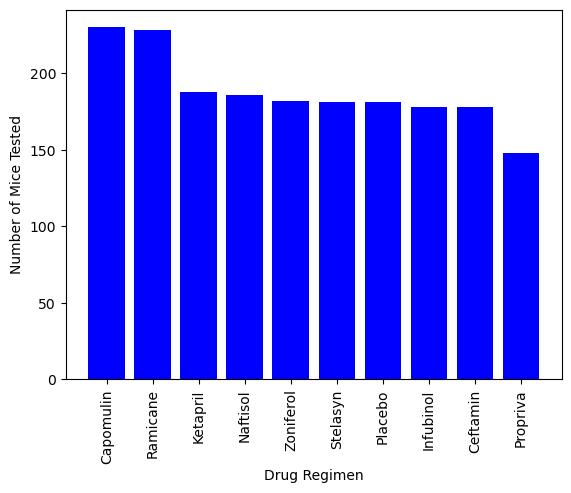

In [14]:
#generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

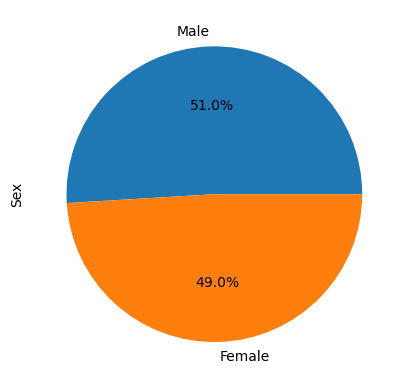

In [15]:
#generate a pie plot showing the distribution of female versus male mice using pandas
male_v_female = clean_df["Sex"].value_counts()
male_v_female.plot.pie(autopct= "%1.1f%%")
plt.show()

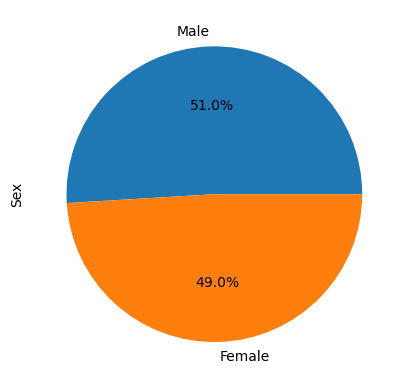

In [16]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = male_v_female.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

In [17]:
timepoint_max = clean_df.groupby("Mouse ID")["Timepoint"].max()
timepoint_max = timepoint_max.reset_index()

timepoint_merge = timepoint_max.merge(clean_df,on=["Mouse ID","Timepoint"])
timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
#put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

tumor_vol_list = []

for drug in treatment_list:
    tumor_volume = timepoint_merge.loc[timepoint_merge["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_volume)
    
    tumor_quantiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = tumor_volume.quantile(.25)
    upperq = tumor_volume.quantile(.75)
    iqr = upperq - lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume > upperb) | (tumor_volume < lowerb)]
    print(drug,outliers)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


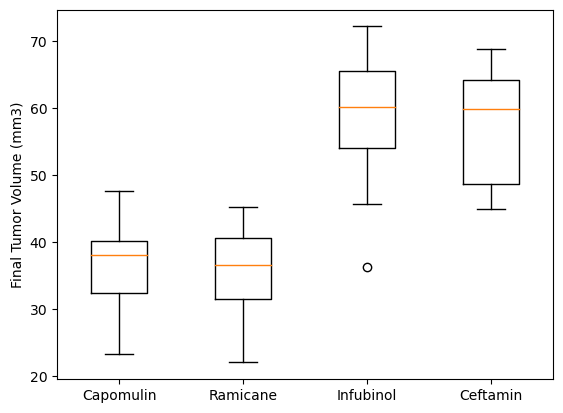

In [19]:
#generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.boxplot(tumor_vol_list,labels=treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

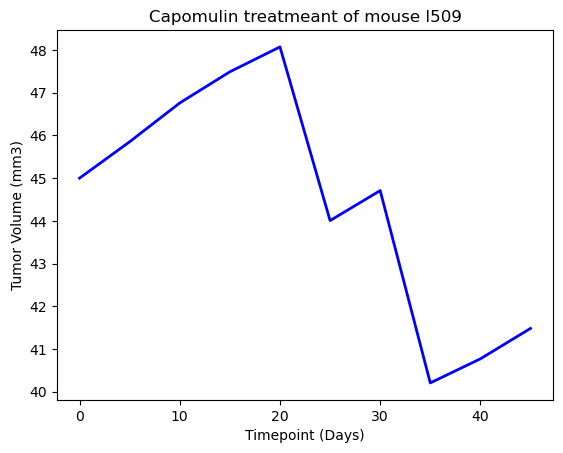

In [20]:
#generate a line plot of tumor volume vs timepoint for a mouse treated with capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumersize = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumersize,linewidth=2, markersize=15,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

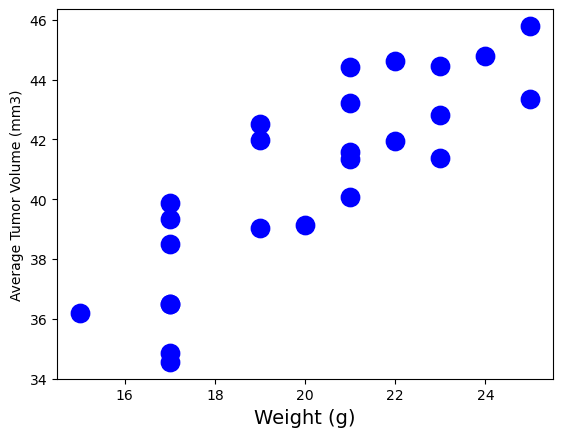

In [21]:
#generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()

avg_vol_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avg_vol_weight_plot = avg_vol_weight.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()


marker_size=15
plt.scatter(avg_vol_weight_plot["Weight (g)"],avg_vol_weight_plot['Tumor Volume (mm3)'],s=175, color="blue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [22]:
#calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_vol_weight_plot['Weight (g)'],avg_vol_weight_plot['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


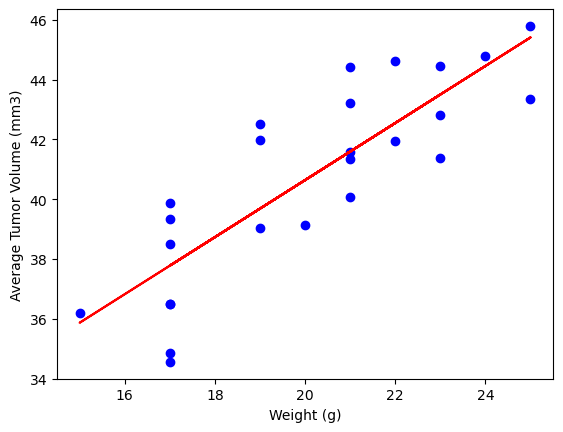

In [23]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_vol_weight_plot["Weight (g)"],avg_vol_weight_plot["Tumor Volume (mm3)"])
regress_values=avg_vol_weight_plot["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_vol_weight_plot["Weight (g)"],avg_vol_weight_plot["Tumor Volume (mm3)"],color='b')
plt.plot(avg_vol_weight_plot["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()